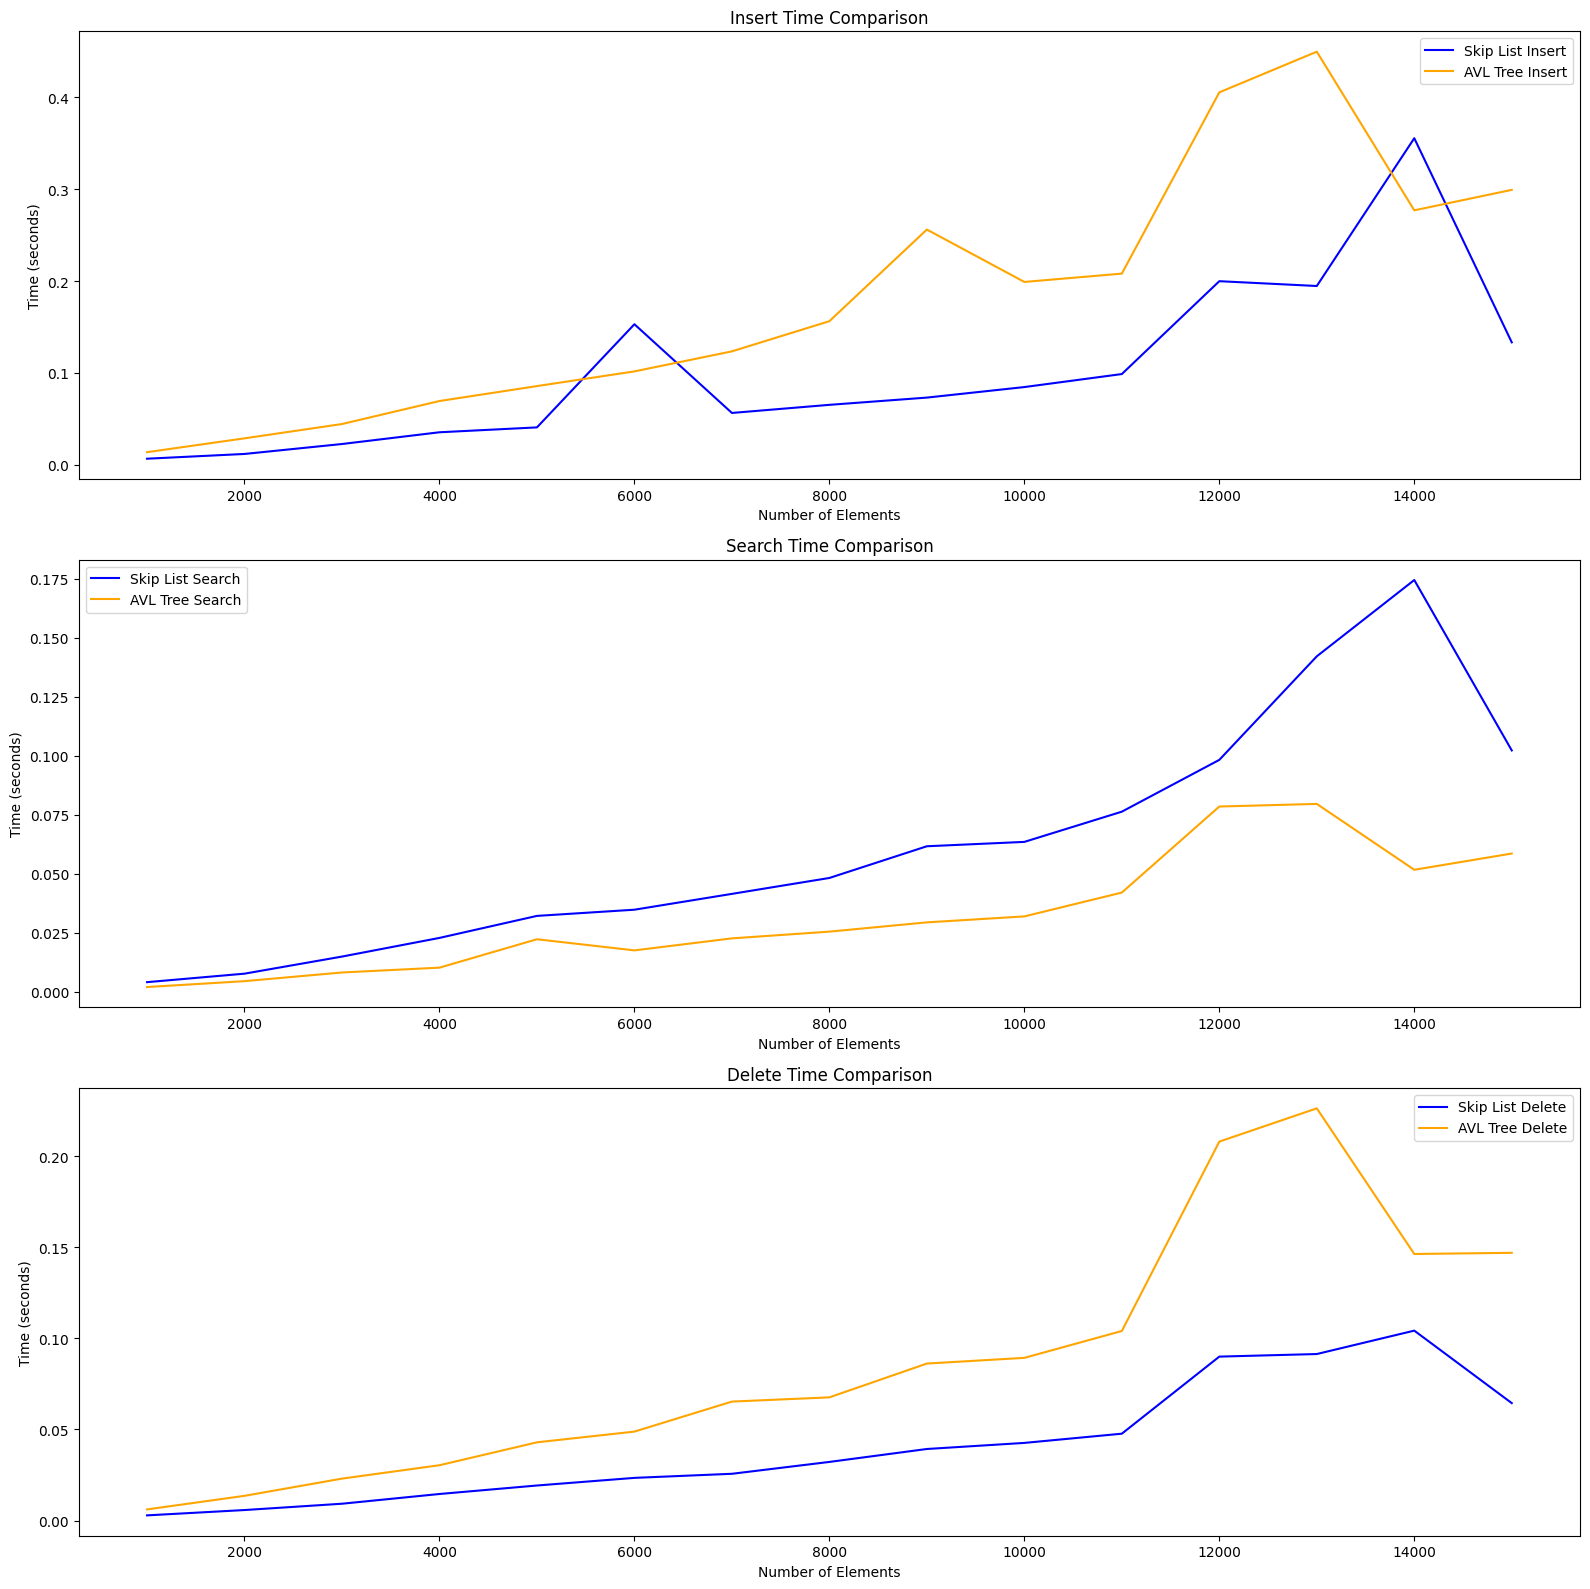

In [46]:
import time
import random
import random
import time
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value, level):
        self.value = value
        self.forward = [None] * (level + 1)

class SkipList:
    def __init__(self, max_level, p):
        self.max_level = max_level
        self.p = p
        self.header = Node(None, self.max_level)
        self.level = 0

    def random_level(self):
        level = 0
        while random.random() < self.p and level < self.max_level:
            level += 1
        return level

    def insert(self, value):
        update = [None] * (self.max_level + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] is not None and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current is None or current.value != value:
            new_level = self.random_level()
            if new_level > self.level:
                for i in range(self.level + 1, new_level + 1):
                    update[i] = self.header
                self.level = new_level
            new_node = Node(value, new_level)
            for i in range(new_level + 1):
                new_node.forward[i] = update[i].forward[i]
                update[i].forward[i] = new_node

    # def search(self, value):
    #     current = self.header
    #     for i in range(self.level, -1, -1):
    #         while current.forward[i] is not None and current.forward[i].value < value:
    #             current = current.forward[i]
    #     current = current.forward[0]
    #     return current is not None and current.value == value

    def search(self, value):
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] is not None and current.forward[i].value < value:
                current = current.forward[i]
        current = current.forward[0]
        return current is not None and current.value == value

    def delete(self, value):
        update = [None] * (self.max_level + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] is not None and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current is not None and current.value == value:
            for i in range(self.level + 1):
                if update[i].forward[i] != current:
                    break
                update[i].forward[i] = current.forward[i]
            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -= 1

class BBSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def insert(self, root, value):
        if not root:
            return BBSTNode(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        return self.balance(root)

    def delete(self, root, value):
        if not root:
            return root
        if value < root.value:
            root.left = self.delete(root.left, value)
        elif value > root.value:
            root.right = self.delete(root.right, value)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            temp = self.get_min_value_node(root.right)
            root.value = temp.value
            root.right = self.delete(root.right, temp.value)

        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        return self.balance(root)

    def get_min_value_node(self, root):
        current = root
        while current.left is not None:
            current = current.left
        return current

    def balance(self, root):
        balance_factor = self.get_balance(root)
        if balance_factor > 1:
            if self.get_balance(root.left) < 0:
                root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        if balance_factor < -1:
            if self.get_balance(root.right) > 0:
                root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
        return root

    def left_rotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        return y

    def right_rotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        return y

    def get_height(self, root):
        return 0 if not root else root.height

    def get_balance(self, root):
        return self.get_height(root.left) - self.get_height(root.right) if root else 0

    def search(self, root, value):
        if not root:
            return False
        if root.value == value:
            return True
        elif value < root.value:
            return self.search(root.left, value)
        else:
            return self.search(root.right, value)

def time_operation(data_structure, operation_function, *args):
    start_time = time.time()
    for value in args:
        if(isinstance(data_structure, SkipList)):
            operation_function(value)
        else:
          operation_function(data_structure, value)  # Pass the instance and the value
    return time.time() - start_time


def performance_analysis(max_elements):
    skip_list = SkipList(max_level=20, p=0.5)
    avl_tree = AVLTree()

    insert_times_skip = []
    search_times_skip = []
    delete_times_skip = []

    insert_times_avl = []
    search_times_avl = []
    delete_times_avl = []

    for num_elements in range(1000, max_elements + 1, 1000):
        values = random.sample(range(1, 20000), num_elements)
        values_to_delete = random.sample(values, num_elements // 2)

        # Skip List Operations
        insert_time_skip = time_operation(skip_list, skip_list.insert, *values)
        search_time_skip = time_operation(skip_list, skip_list.search, *values)
        delete_time_skip = time_operation(skip_list, skip_list.delete, *values_to_delete)

        insert_times_skip.append(insert_time_skip)
        search_times_skip.append(search_time_skip)
        delete_times_skip.append(delete_time_skip)

        # AVL Tree Operations
        root = None
        insert_start_time_avl = time.time()
        for value in values:
            root = avl_tree.insert(root, value)
        insert_time_avl = time.time() - insert_start_time_avl

        search_start_time_avl = time.time()
        for value in values:
            avl_tree.search(root, value)
        search_time_avl = time.time() - search_start_time_avl

        delete_start_time_avl = time.time()
        for value in values_to_delete:
            root = avl_tree.delete(root, value)
        delete_time_avl = time.time() - delete_start_time_avl

        insert_times_avl.append(insert_time_avl)
        search_times_avl.append(search_time_avl)
        delete_times_avl.append(delete_time_avl)

    # Plotting
    plt.figure(figsize=(16, 16))

    # Insert Times
    plt.subplot(3, 1, 1)
    plt.plot(range(1000, max_elements + 1, 1000), insert_times_skip, label='Skip List Insert', color='blue')
    plt.plot(range(1000, max_elements + 1, 1000), insert_times_avl, label='AVL Tree Insert', color='orange')
    plt.title('Insert Time Comparison')
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (seconds)')
    plt.legend()

    # Search Times
    plt.subplot(3, 1, 2)
    plt.plot(range(1000, max_elements + 1, 1000), search_times_skip, label='Skip List Search', color='blue')
    plt.plot(range(1000, max_elements + 1, 1000), search_times_avl, label='AVL Tree Search', color='orange')
    plt.title('Search Time Comparison')
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (seconds)')
    plt.legend()

    # Delete Times
    plt.subplot(3, 1, 3)
    plt.plot(range(1000, max_elements + 1, 1000), delete_times_skip, label='Skip List Delete', color='blue')
    plt.plot(range(1000, max_elements + 1, 1000), delete_times_avl, label='AVL Tree Delete', color='orange')
    plt.title('Delete Time Comparison')
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (seconds)')
    plt.legend()

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    performance_analysis(15000)